In [119]:
#! pip install transformers torch scikit-learn
from transformers import BertTokenizer, BertModel
import torch
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [120]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)  # Enable attention output

# Define the sentence
sentence = "NRPS and PKS products come from assembly lines of modules."

inputs = tokenizer(sentence, return_tensors='pt')
tokens = tokenizer.tokenize(sentence)

# Pass the inputs through the model
with torch.no_grad():
    outputs = model(**inputs)

# Get the hidden states
hidden_states = outputs.last_hidden_state

# Extract the embeddings for each word
word_embeddings = hidden_states[0].numpy()

# Select the first three dimensions for each word
word_embeddings_3d = word_embeddings[:, :3]

/datadrive/chatBGC_benchmark/chatbgc_env/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `

In [133]:
max(word_embeddings_3d[:, 0])*1.1

1.2300733089447022

In [134]:
min(word_embeddings_3d[:, 0])*1.1

-1.0663914561271668

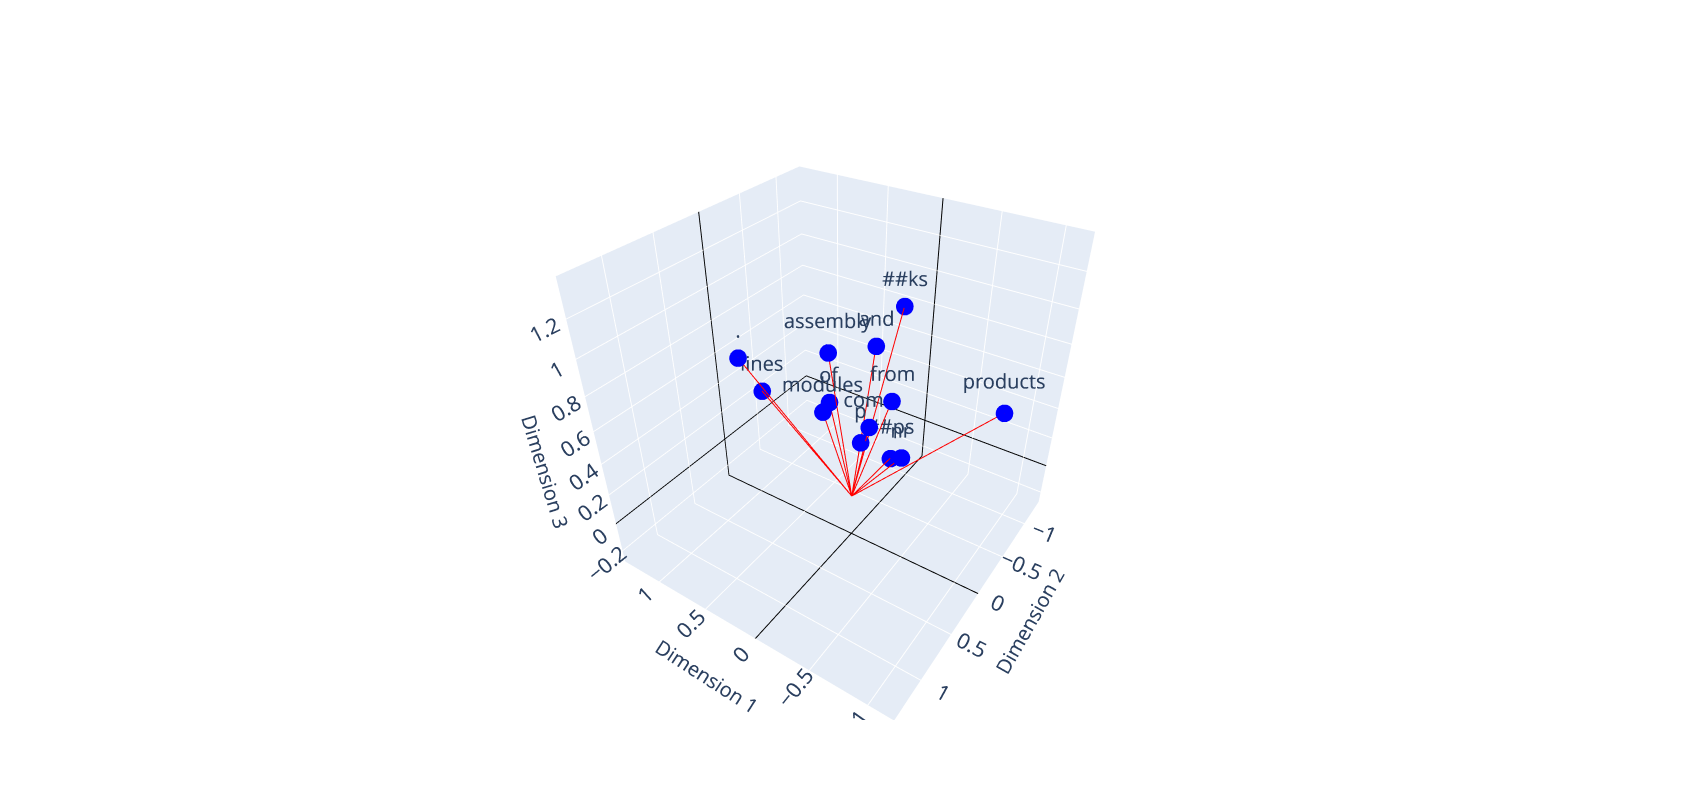

In [136]:
# Create a 3D scatter plot using Plotly
fig = go.Figure()

# Add each word to the plot and draw a line from origin
for i, word in enumerate(tokens):
    # Plot the word embedding as a point
    fig.add_trace(go.Scatter3d(
        x=[word_embeddings_3d[i, 0]],
        y=[word_embeddings_3d[i, 1]],
        z=[word_embeddings_3d[i, 2]],
        mode='markers+text',
        marker=dict(size=10, color='blue'),  # Increased marker size and set color to blue
        text=[word],
        textposition='top center',
        textfont=dict(size=20),  # Increase label size
        showlegend=False  # Hide legend for points
    ))
    
    # Plot a line from the origin to the word embedding
    fig.add_trace(go.Scatter3d(
        x=[0, word_embeddings_3d[i, 0]],
        y=[0, word_embeddings_3d[i, 1]],
        z=[0, word_embeddings_3d[i, 2]],
        mode='lines',
        line=dict(color='red', width=2),
        showlegend=False  # Hide legend for lines
    ))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='Dimension 1',
            titlefont=dict(size=20),
            tickfont=dict(size=16),
            showline=True,
            zeroline=True,
            zerolinecolor='black',
            zerolinewidth=2,
            range=[min(word_embeddings_3d[:, 0])*1.25, max(word_embeddings_3d[:, 0])*1.25] 
        ),
        yaxis=dict(
            title='Dimension 2',
            titlefont=dict(size=20),
            tickfont=dict(size=16),
            showline=True,
            zeroline=True,
            zerolinecolor='black',
            zerolinewidth=2,
            range=[min(word_embeddings_3d[:, 1])*1.25, max(word_embeddings_3d[:, 0])*1.25] 
        ),
        zaxis=dict(
            title='Dimension 3',
            titlefont=dict(size=20),
            tickfont=dict(size=16),
            showline=True,
            zeroline=True,
            zerolinecolor='black',
            zerolinewidth=2,
            range=[min(word_embeddings_3d[:, 2])*1.25, max(word_embeddings_3d[:, 0])*1.25] 
        ),
        camera=dict(
            eye=dict(x=-1, y=1.5, z=1.3)  # Adjust the camera angle here
        )
    ),
    #title=dict(
    #    text="3D Visualization of Sentence Embeddings with Vectors",
    #    font=dict(size=24)
    #),
    scene_aspectmode='cube',  # Ensures that the axes are scaled equally
    width=800,  # Increase overall figure size
    height=800,
    showlegend=False  # Hide the legend in the plot
)

# Save the figure as a high-resolution SVG
fig.write_image("sentence_embeddings.svg", format='svg', width=1200, height=1200)

# Show the plot
fig.show()

In [122]:
# Print the first 7 values and the last value of each token's embedding, rounded to 1 decimal place
print("Word Embeddings (First 7 + Last) for each token (rounded to 1 decimal place):")
for i, word in enumerate(tokens):
    first_7 = word_embeddings[i, :7].round(1)  # First 7 values
    last_value = word_embeddings[i, -1].round(1)  # Last value
    print(f"{word}: {[f'{x:.1f}' for x in first_7]} ... {last_value:.1f}")

Word Embeddings (First 7 + Last) for each token (rounded to 1 decimal place):
nr: ['-0.4', '-0.1', '0.4', '-0.0', '-0.4', '-0.4', '-0.2'] ... 0.4
##ps: ['-0.0', '-0.6', '0.0', '0.2', '0.1', '0.1', '-0.3'] ... 0.4
and: ['0.0', '-0.4', '0.8', '0.7', '0.8', '-0.2', '-0.8'] ... 0.2
p: ['-0.1', '0.1', '0.5', '0.4', '-0.0', '-0.4', '-0.7'] ... -0.1
##ks: ['0.1', '-1.1', '0.8', '0.6', '0.4', '0.1', '-0.4'] ... 0.5
products: ['-1.0', '-0.7', '0.5', '0.5', '0.3', '-0.0', '-0.5'] ... -0.2
come: ['-0.2', '0.1', '0.6', '0.1', '0.4', '-0.3', '-0.2'] ... 0.0
from: ['-0.4', '0.2', '0.8', '0.3', '0.3', '-0.4', '-0.1'] ... 0.6
assembly: ['0.1', '0.2', '0.9', '0.5', '0.2', '-0.5', '-0.1'] ... -0.3
lines: ['1.0', '-0.1', '0.4', '0.2', '-0.0', '-0.3', '-0.5'] ... 0.3
of: ['0.1', '0.1', '0.6', '-0.0', '0.1', '0.1', '-0.2'] ... 0.3
modules: ['0.1', '0.3', '0.6', '0.2', '0.1', '-0.2', '-0.4'] ... 0.1
.: ['1.1', '0.0', '0.6', '0.3', '0.0', '-0.5', '-0.9'] ... 0.1


In [123]:
# Create a matrix to store the first 7 values and the last value of each token's embedding
data = []
for i, word in enumerate(tokens):
    first_7 = word_embeddings[i, :7].round(1)  # First 7 values rounded to 1 decimal place
    last_value = word_embeddings[i, -1].round(1)  # Last value rounded to 1 decimal place
    data.append(list(first_7) + [last_value])

# Create a DataFrame for better visualization
columns = [f'Dim {i+1}' for i in range(7)] + ['Dim Last']
df = pd.DataFrame(data, index=tokens, columns=columns).T

# Print the DataFrame
print("Word Embeddings (First 7 + Last) for each token (rounded to 1 decimal place):")
df.to_csv("99.Example_embedding.csv")
df

Word Embeddings (First 7 + Last) for each token (rounded to 1 decimal place):


,nr,##ps,and,p,##ks,products,come,from,assembly,lines,of,modules,.
Dim 1,-0.4,-0.0,0.0,-0.1,0.1,-1.0,-0.2,-0.4,0.1,1.0,0.1,0.1,1.1
Dim 2,-0.1,-0.6,-0.4,0.1,-1.1,-0.7,0.1,0.2,0.2,-0.1,0.1,0.3,0.0
Dim 3,0.4,0.0,0.8,0.5,0.8,0.5,0.6,0.8,0.9,0.4,0.6,0.6,0.6
Dim 4,-0.0,0.2,0.7,0.4,0.6,0.5,0.1,0.3,0.5,0.2,-0.0,0.2,0.3
Dim 5,-0.4,0.1,0.8,-0.0,0.4,0.3,0.4,0.3,0.2,-0.0,0.1,0.1,0.0
Dim 6,-0.4,0.1,-0.2,-0.4,0.1,-0.0,-0.3,-0.4,-0.5,-0.3,0.1,-0.2,-0.5
Dim 7,-0.2,-0.3,-0.8,-0.7,-0.4,-0.5,-0.2,-0.1,-0.1,-0.5,-0.2,-0.4,-0.9
Dim Last,0.4,0.4,0.2,-0.1,0.5,-0.2,0.0,0.6,-0.3,0.3,0.3,0.1,0.1


In [124]:
def attention(query, key, value):
    scores = np.dot(query, key.T)
    distribution = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    output = np.dot(distribution, value)
    return output, distribution

# Use the embeddings for attention calculation
query = word_embeddings_3d
key = word_embeddings_3d
value = word_embeddings_3d

output, distribution = attention(query, key, value)


In [125]:
import plotly.graph_objs as go

# Create a heatmap of the attention distribution
heatmap = go.Heatmap(
    z=distribution,
    x=tokens,
    y=tokens,
    colorscale='Viridis'
)

# Layout configuration with 1:1 aspect ratio and increased text size
layout = go.Layout(
    xaxis=dict(
        scaleanchor='y',  # Ensures a 1:1 aspect ratio
        constrain='domain',  # Ensures the plot stays within the defined axis
        tickfont=dict(size=20)  # Increase text size of x-axis labels
    ),
    yaxis=dict(
        scaleanchor='x',  # Ensures a 1:1 aspect ratio
        tickfont=dict(size=20)  # Increase text size of y-axis labels
    )
)

# Create figure and display it
fig = go.Figure(data=[heatmap], layout=layout)
fig.update_layout(
    width=800,
    height=600,
)
fig.show()


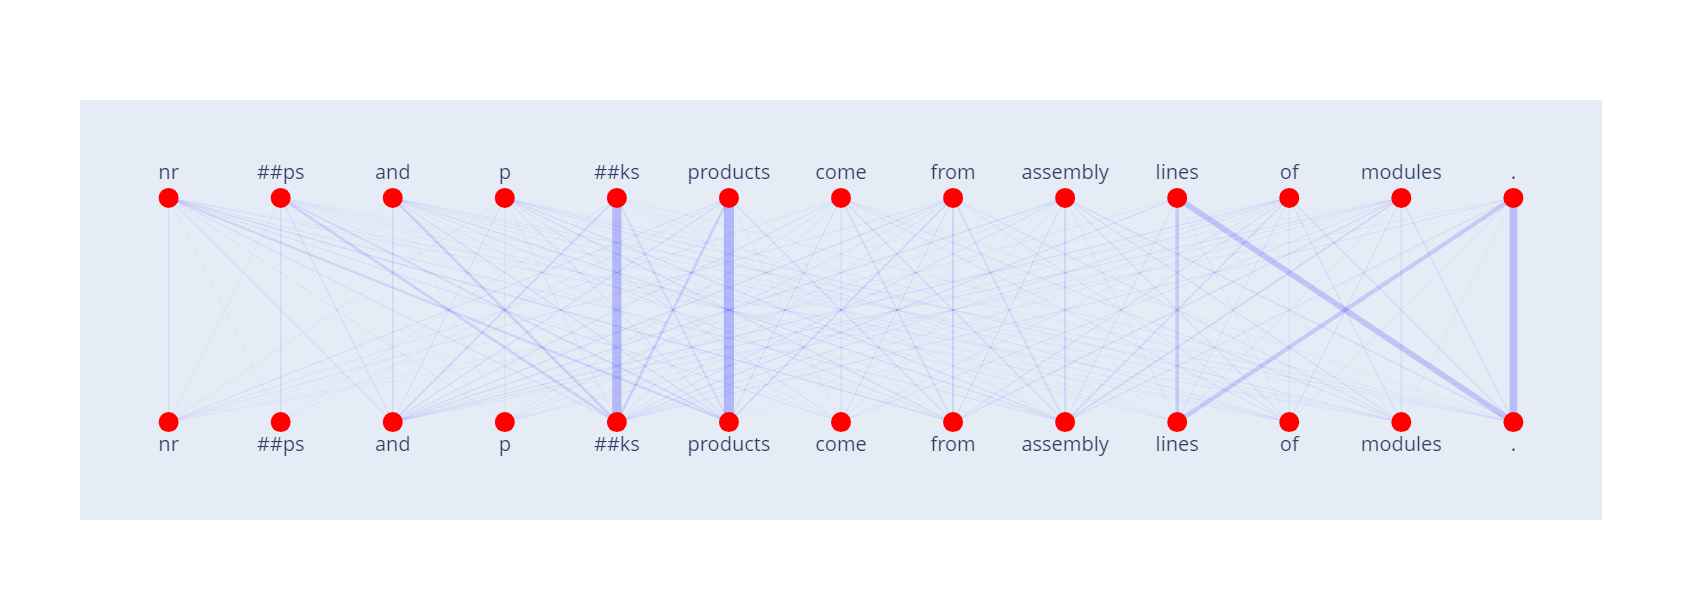

In [126]:
import networkx as nx
import plotly.graph_objs as go
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes for the first sentence
for i, token in enumerate(tokens):
    G.add_node(f's1_{i}', label=token, layer=1)

# Add nodes for the second sentence (duplicate of the first)
for i, token in enumerate(tokens):
    G.add_node(f's2_{i}', label=token, layer=2)

# Add edges based on attention values between the two sentences
for i in range(len(tokens)):
    for j in range(len(tokens)):
        weight = distribution[i, j]
        if weight > 0.05:  # filter out very weak connections
            G.add_edge(f's1_{i}', f's2_{j}', weight=weight)

# Get node positions in two rows (one for each sentence)
pos = {}
for i in range(len(tokens)):
    pos[f's1_{i}'] = (i, 1)  # First sentence on y=1
    pos[f's2_{i}'] = (i, -1) # Second sentence on y=-1

# Extract edge data for Plotly
edge_traces = []

# Apply a non-linear scaling (e.g., squaring) to make weights more extreme
def scale_weight(weight, scale_factor=2):
    return weight ** scale_factor

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = edge[2]['weight']
    scaled_weight = scale_weight(weight)
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=scaled_weight * 200, color='blue'),  # Increased scaling for visibility
        opacity=weight,  # Use scaled weight directly as opacity
        mode='lines',
        hoverinfo='none'
    )
    edge_traces.append(edge_trace)

# Create node trace for the first sentence
node_x = []
node_y = []
node_labels = []

for node in G.nodes(data=True):
    x, y = pos[node[0]]
    node_x.append(x)
    node_y.append(y)
    node_labels.append(node[1]['label'])

node_trace_1 = go.Scatter(
    x=node_x[:len(tokens)],
    y=node_y[:len(tokens)],
    mode='markers+text',
    text=node_labels[:len(tokens)],
    textposition='top center',
    marker=dict(size=20, color='red'),
    textfont=dict(size=20),
    hoverinfo='text'
)

# Create node trace for the second sentence with labels below the nodes
node_trace_2 = go.Scatter(
    x=node_x[len(tokens):],
    y=node_y[len(tokens):],
    mode='markers+text',
    text=node_labels[len(tokens):],
    textposition='bottom center',
    marker=dict(size=20, color='red'),
    textfont=dict(size=20),
    hoverinfo='text'
)

# Combine all traces
fig = go.Figure(data=edge_traces + [node_trace_1, node_trace_2],
                layout=go.Layout(
                    #title='Attention Network with Duplicated Sentences',
                    showlegend=False,
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    hovermode='closest'
                ))

# Adjust the aspect ratio to make sure it's displayed correctly
fig.update_layout(
    width=800,
    height=600,
    xaxis=dict(scaleanchor="y", scaleratio=1)
)

# Display the figure
fig.show()


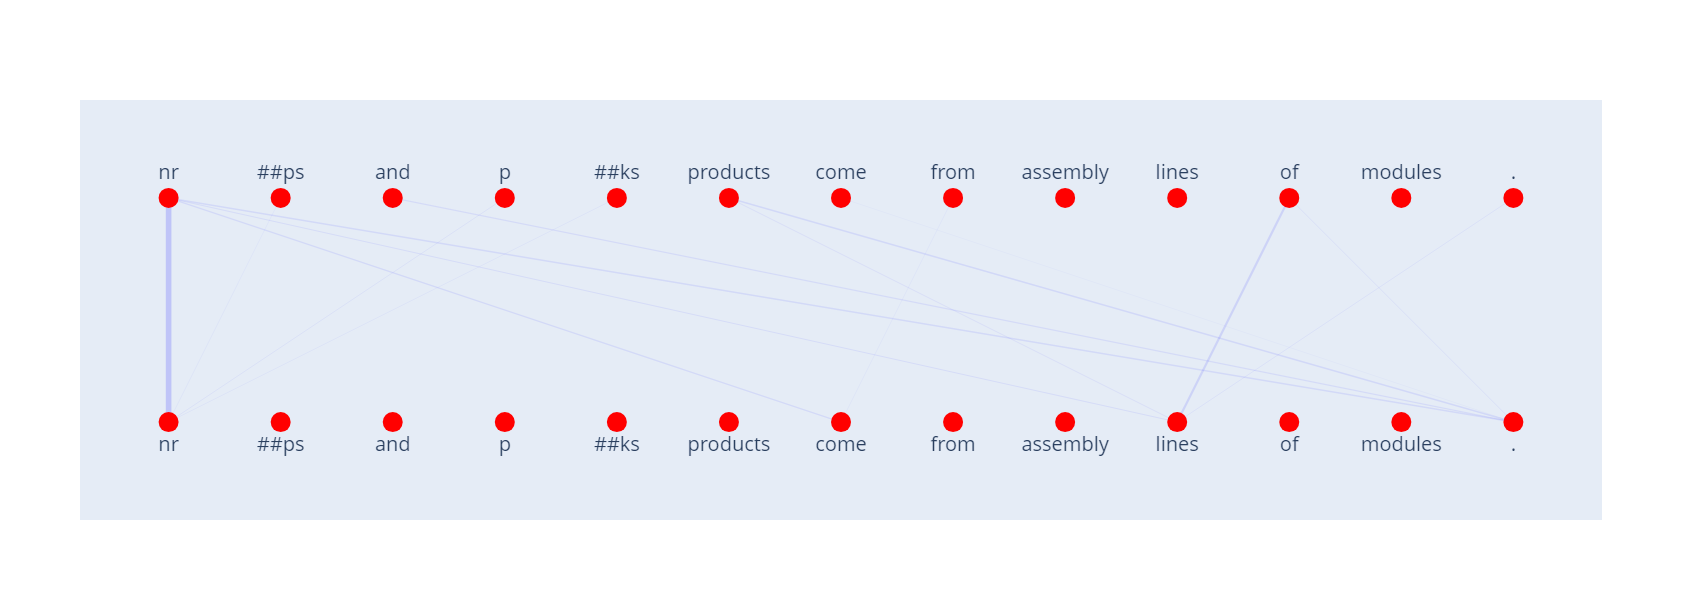

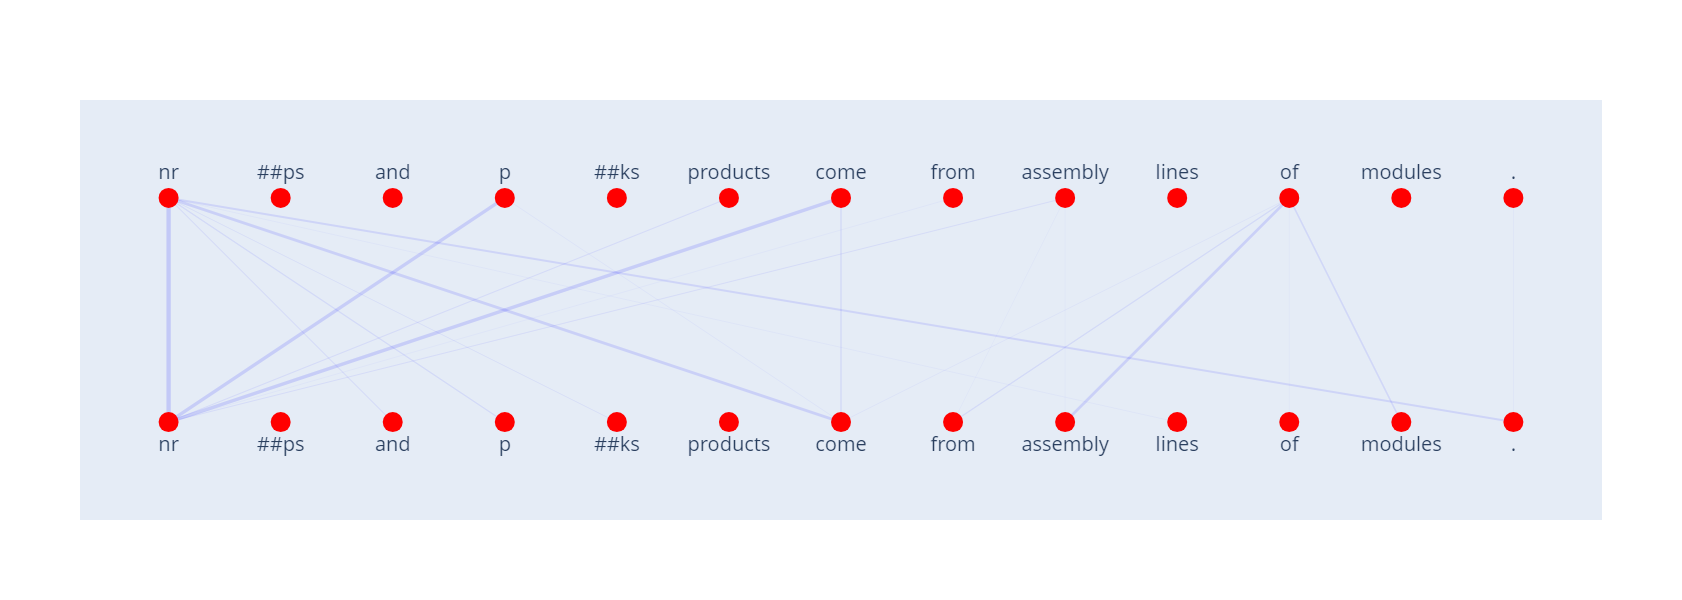

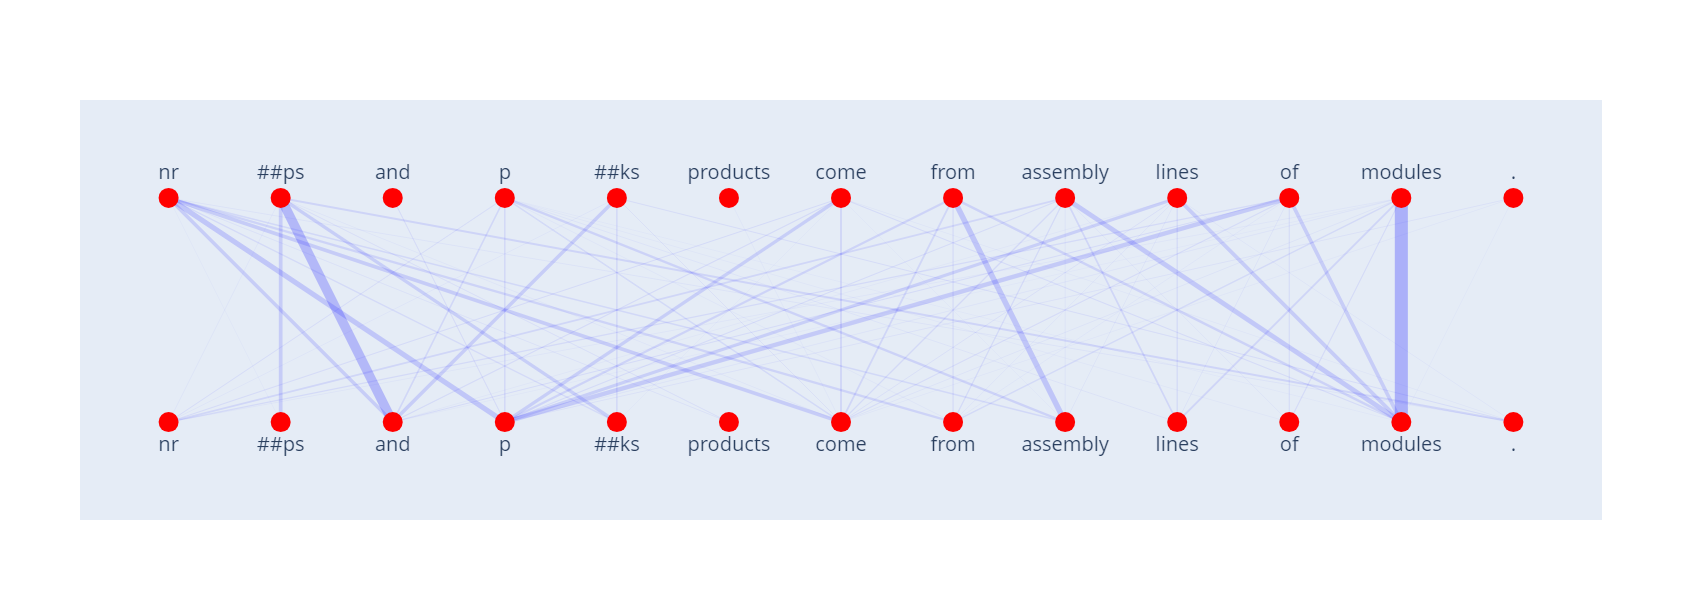

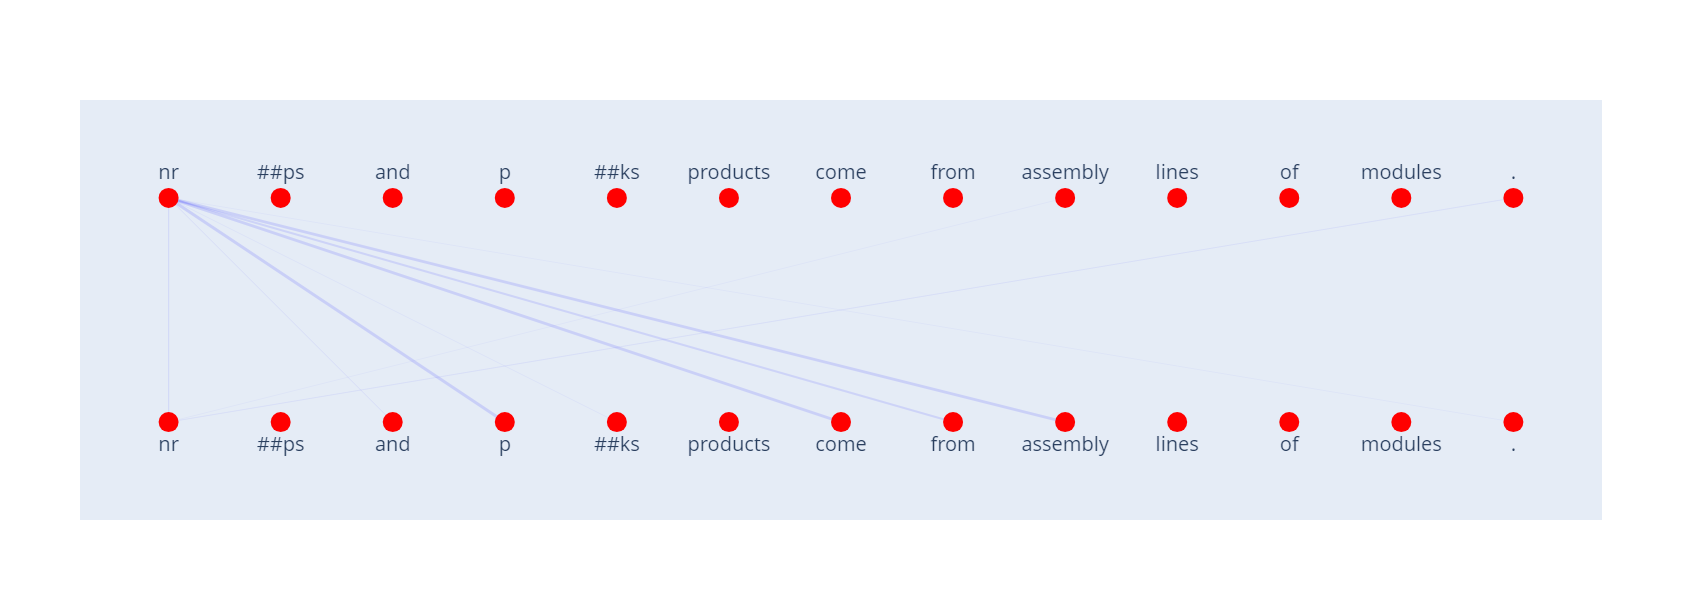

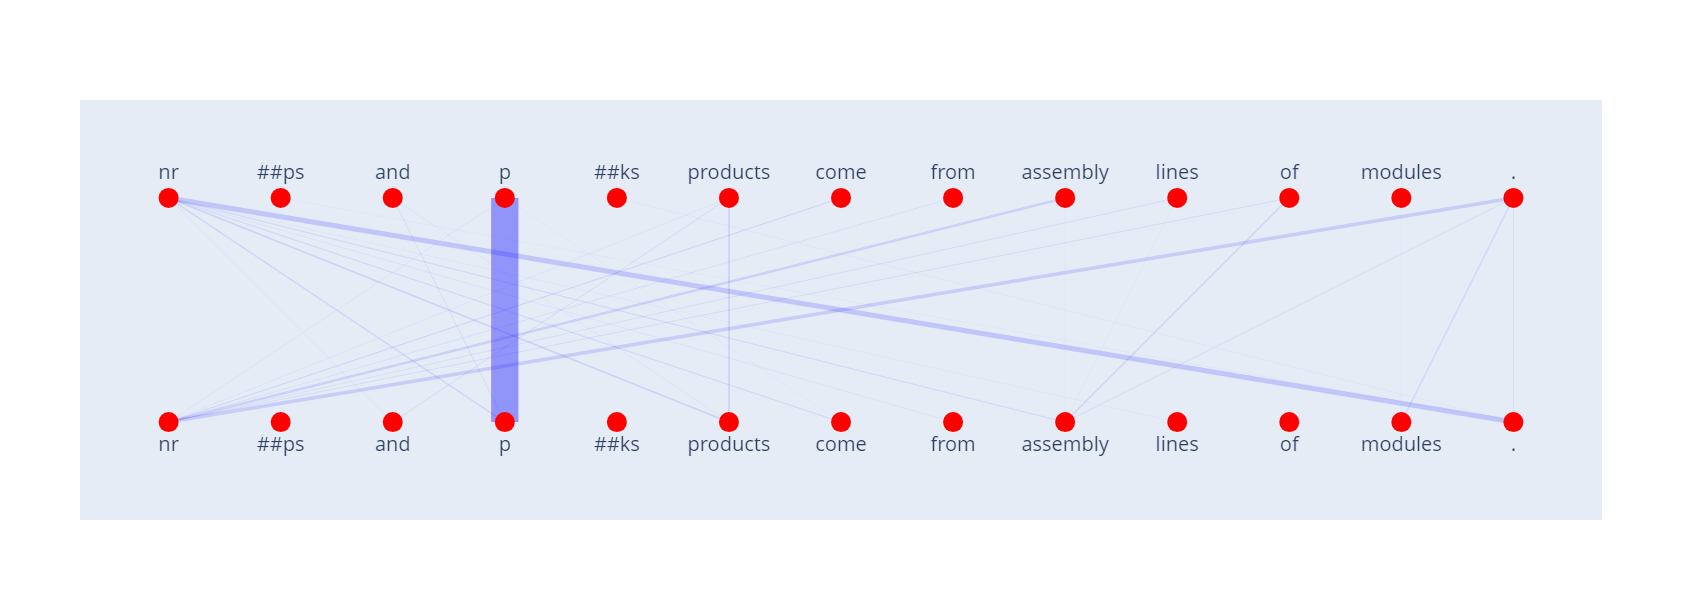

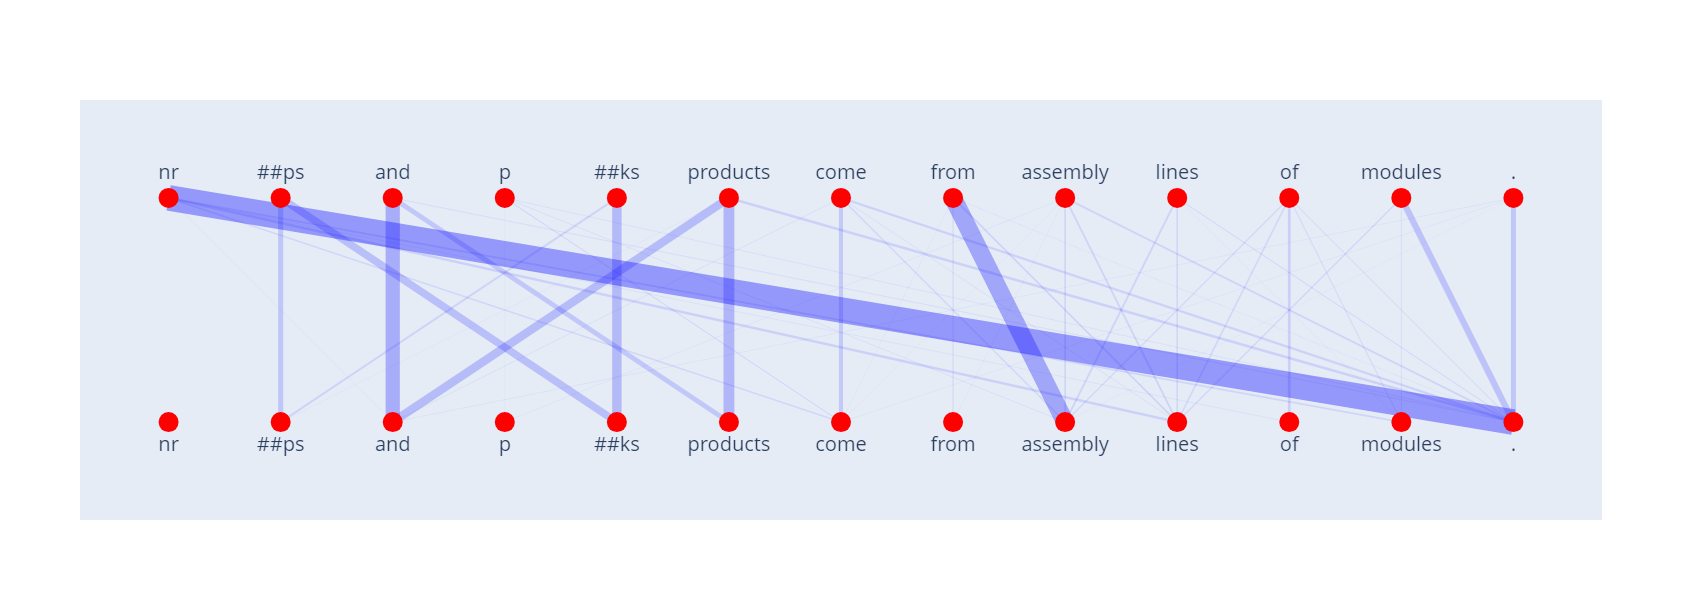

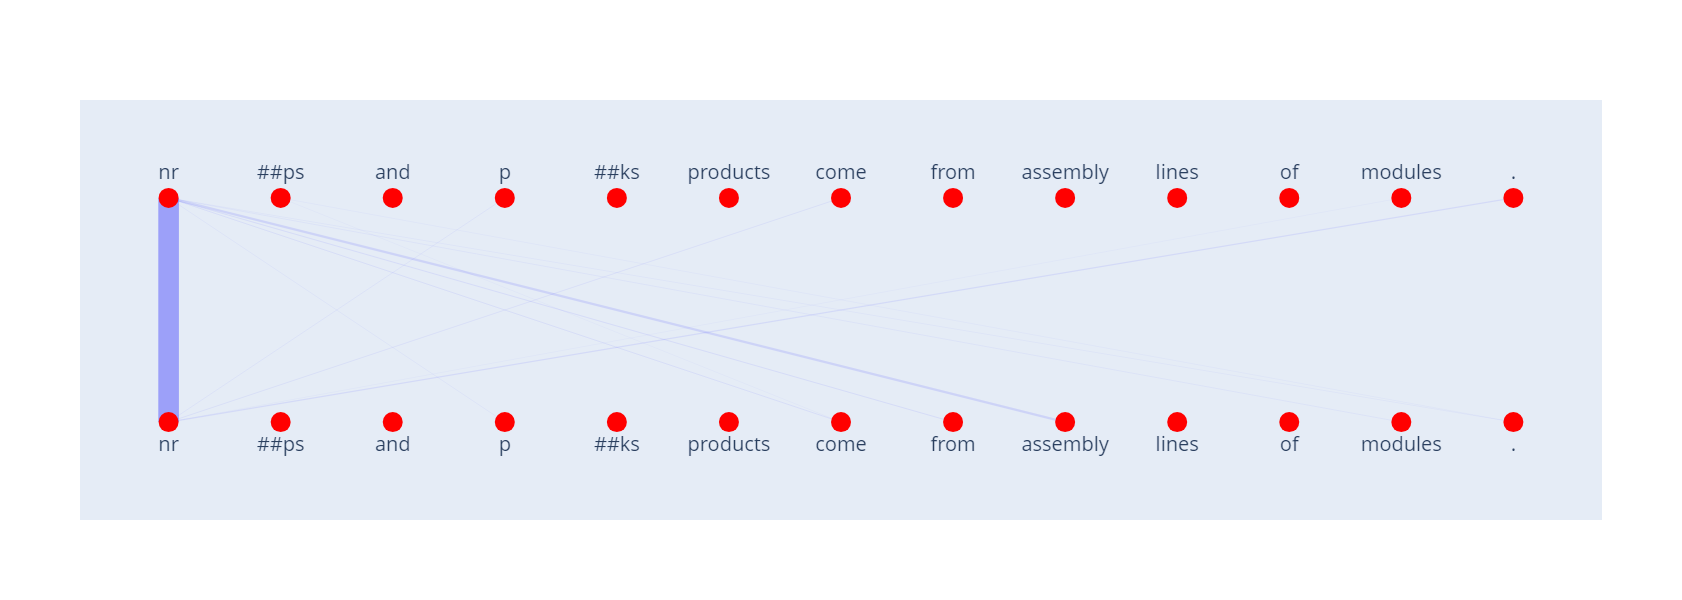

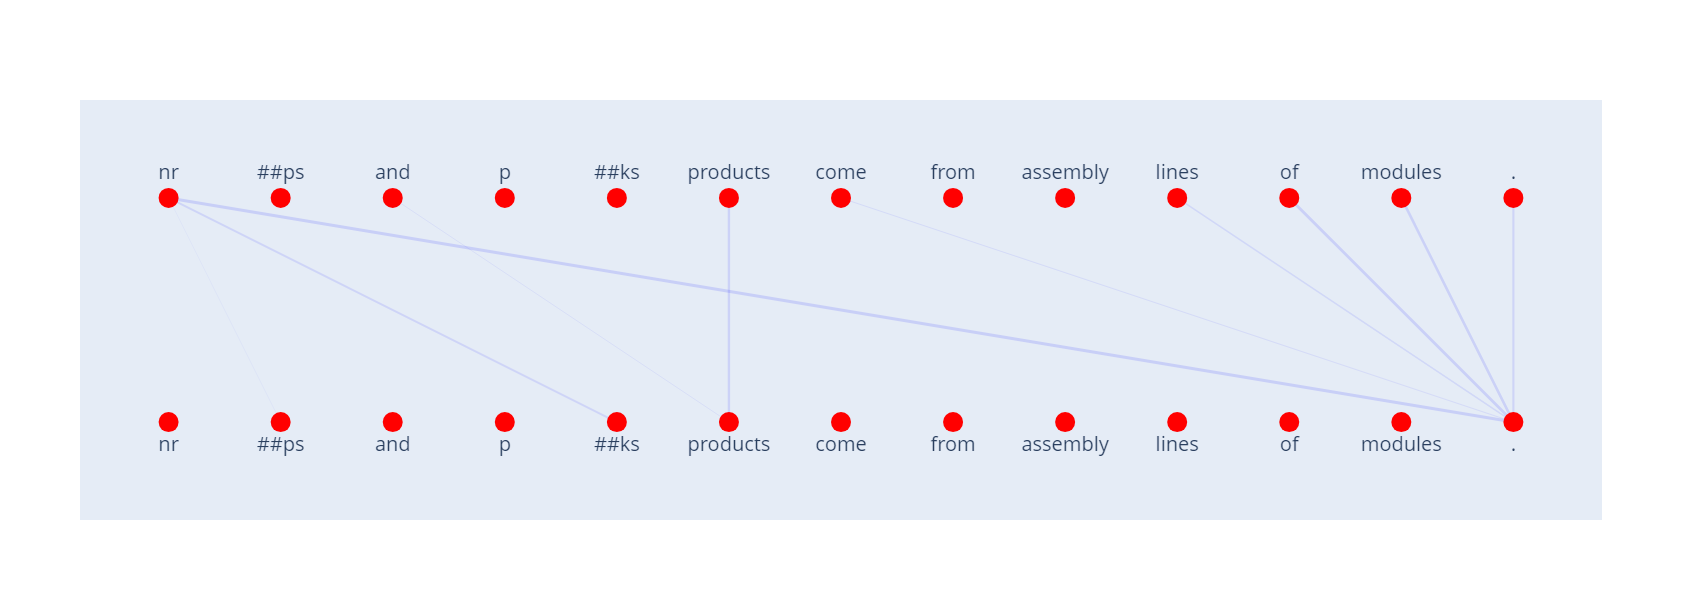

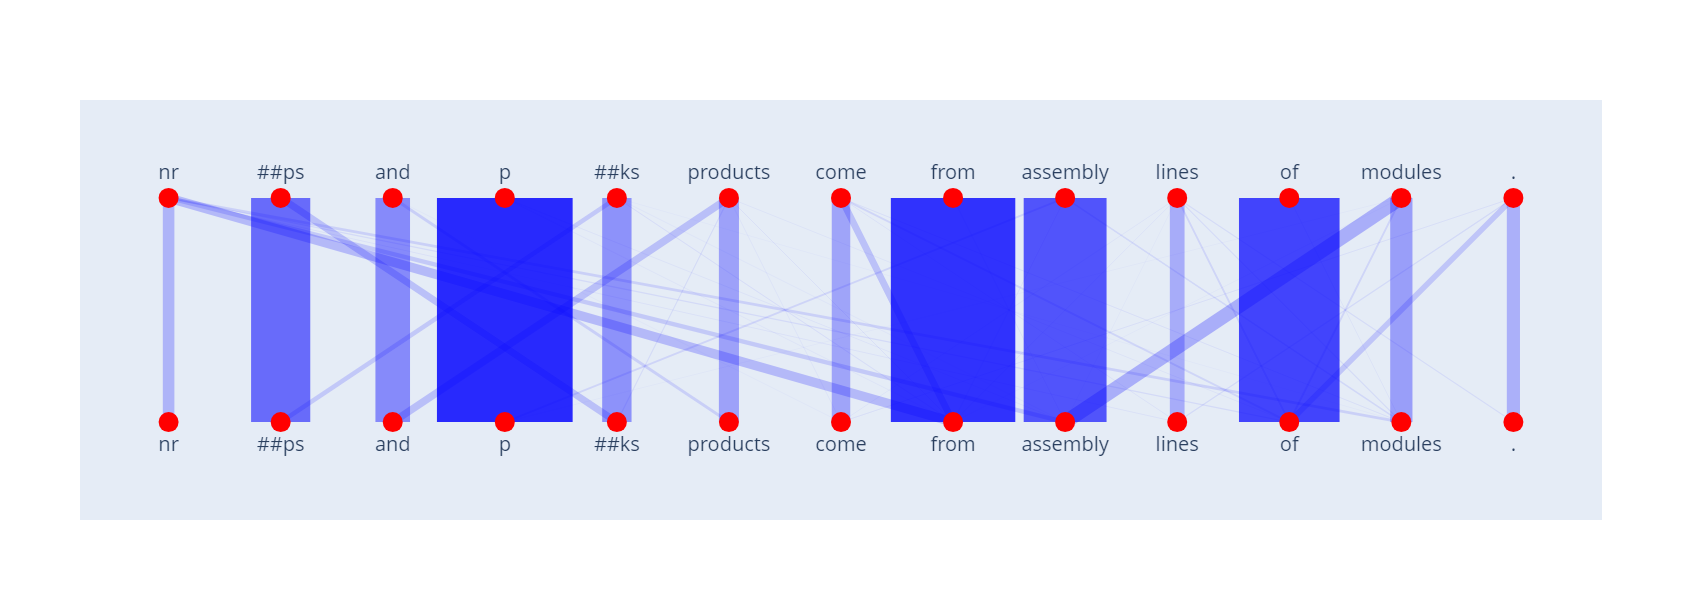

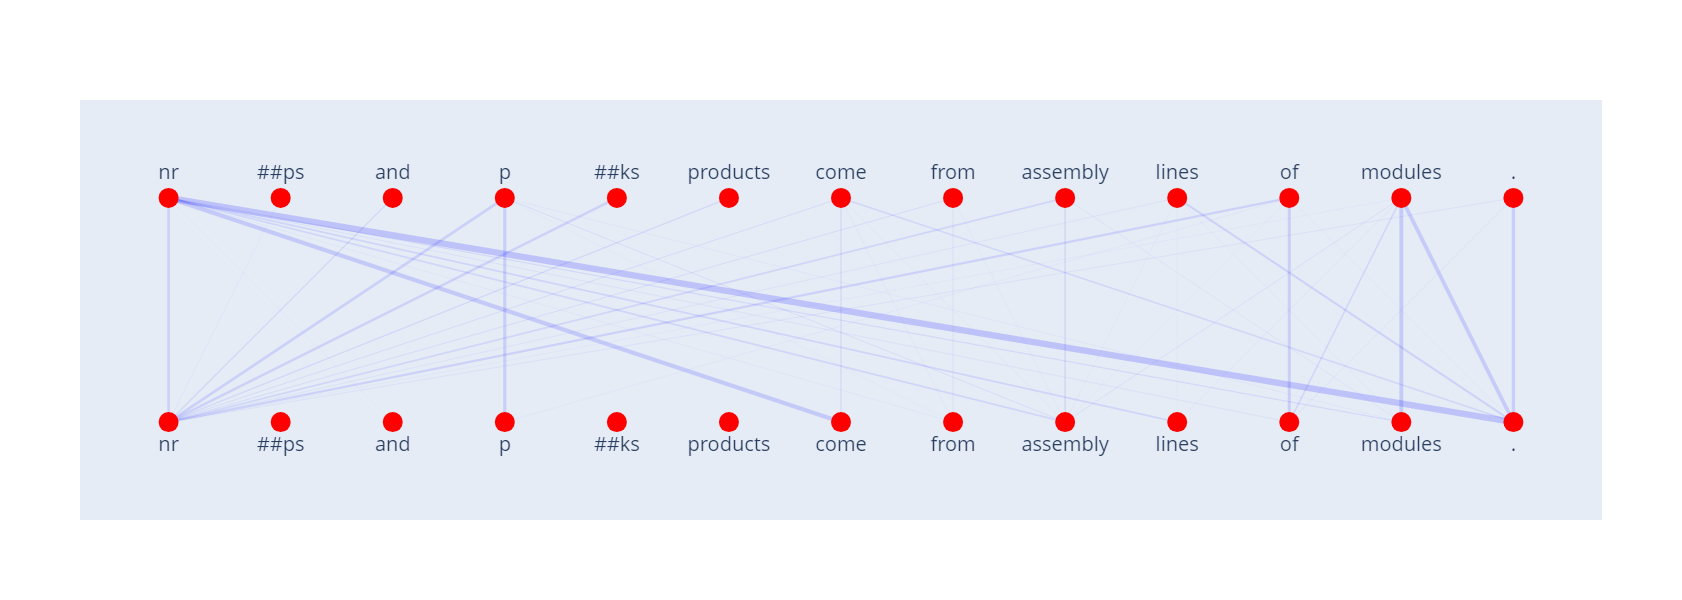

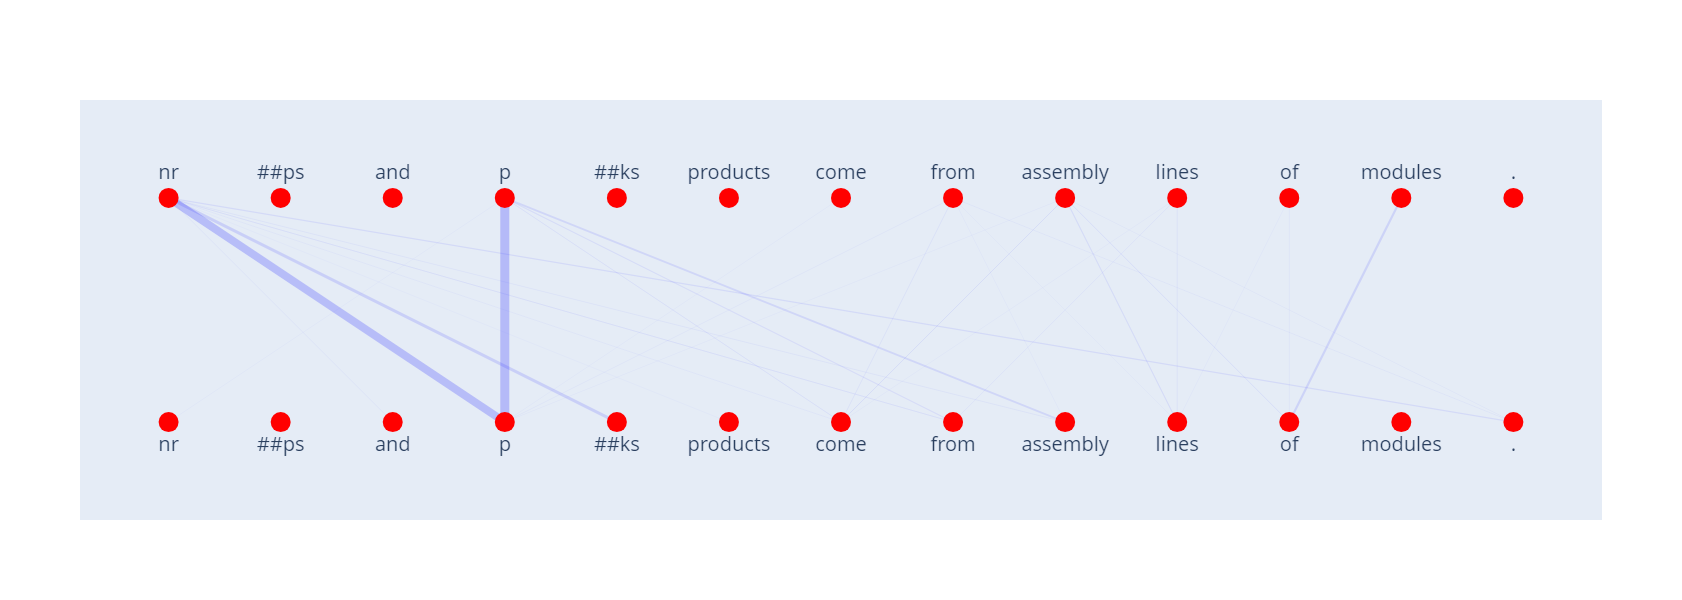

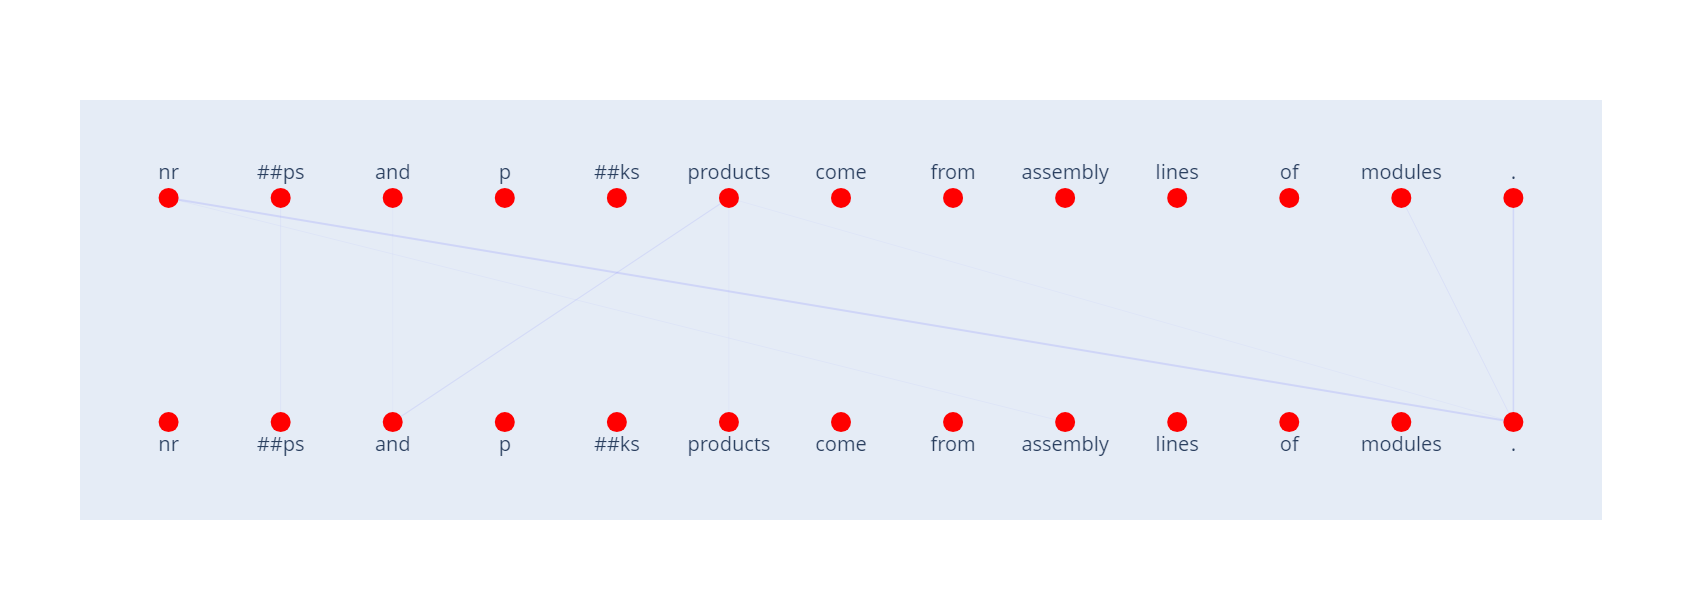

In [127]:
# Get the attention weights from the last layer, first head
attention_weights = outputs.attentions[-1][0].numpy()  # Example: Last layer, first head

for i in attention_weights:
    distribution = i

    # Create a heatmap of the attention distribution
    heatmap = go.Heatmap(
        z=distribution,  # Use the attention weights here
        x=tokens,  # Labels for the x-axis
        y=tokens,  # Labels for the y-axis
        colorscale='Viridis'
    )
    
    # Layout configuration with 1:1 aspect ratio and increased text size
    layout = go.Layout(
        xaxis=dict(
            scaleanchor='y',  # Ensures a 1:1 aspect ratio
            constrain='domain',  # Ensures the plot stays within the defined axis
            tickfont=dict(size=20)  # Increase text size of x-axis labels
        ),
        yaxis=dict(
            scaleanchor='x',  # Ensures a 1:1 aspect ratio
            tickfont=dict(size=20)  # Increase text size of y-axis labels
        )
    )
    
    # Create figure and display it
    fig = go.Figure(data=[heatmap], layout=layout)
    fig.update_layout(
        width=800,
        height=600,
    )
    #fig.show()
    
    
    
    
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes for the first sentence
    for i, token in enumerate(tokens):
        G.add_node(f's1_{i}', label=token, layer=1)
    
    # Add nodes for the second sentence (duplicate of the first)
    for i, token in enumerate(tokens):
        G.add_node(f's2_{i}', label=token, layer=2)
    
    # Add edges based on attention values between the two sentences
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            weight = distribution[i, j]
            if weight > 0.05:  # filter out very weak connections
                G.add_edge(f's1_{i}', f's2_{j}', weight=weight)
    
    # Get node positions in two rows (one for each sentence)
    pos = {}
    for i in range(len(tokens)):
        pos[f's1_{i}'] = (i, 1)  # First sentence on y=1
        pos[f's2_{i}'] = (i, -1) # Second sentence on y=-1
    
    # Extract edge data for Plotly
    edge_traces = []
    
    # Apply a non-linear scaling (e.g., squaring) to make weights more extreme
    def scale_weight(weight, scale_factor=2):
        return weight ** scale_factor
    
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        weight = edge[2]['weight']
        scaled_weight = scale_weight(weight)
        edge_trace = go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(width=scaled_weight * 200, color='blue'),  # Increased scaling for visibility
            opacity=weight,  # Use scaled weight directly as opacity
            mode='lines',
            hoverinfo='none'
        )
        edge_traces.append(edge_trace)
    
    # Create node trace for the first sentence
    node_x = []
    node_y = []
    node_labels = []
    
    for node in G.nodes(data=True):
        x, y = pos[node[0]]
        node_x.append(x)
        node_y.append(y)
        node_labels.append(node[1]['label'])
    
    node_trace_1 = go.Scatter(
        x=node_x[:len(tokens)],
        y=node_y[:len(tokens)],
        mode='markers+text',
        text=node_labels[:len(tokens)],
        textposition='top center',
        marker=dict(size=20, color='red'),
        textfont=dict(size=20),
        hoverinfo='text'
    )
    
    # Create node trace for the second sentence with labels below the nodes
    node_trace_2 = go.Scatter(
        x=node_x[len(tokens):],
        y=node_y[len(tokens):],
        mode='markers+text',
        text=node_labels[len(tokens):],
        textposition='bottom center',
        marker=dict(size=20, color='red'),
        textfont=dict(size=20),
        hoverinfo='text'
    )
    
    # Combine all traces
    fig = go.Figure(data=edge_traces + [node_trace_1, node_trace_2],
                    layout=go.Layout(
                        #title='Attention Network with Duplicated Sentences',
                        showlegend=False,
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        hovermode='closest'
                    ))
    
    # Adjust the aspect ratio to make sure it's displayed correctly
    fig.update_layout(
        width=800,
        height=600,
        xaxis=dict(scaleanchor="y", scaleratio=1)
    )
    
    # Display the figure
    fig.show()


In [128]:
distribution.shape

(15, 15)